# MSE and Cross Entropy

In [1]:
import numpy as np

In [9]:
y = np.array([0.1,  0.04,  0.6,  0,  0.1])
t = np.array([0,    1,     0,    0,    0])

In [10]:
print(y)
print(t)

[0.1  0.04 0.6  0.   0.1 ]
[0 1 0 0 0]


In [11]:
np.sum((y - t)**2)/5

0.26032

In [13]:
y = np.array([0.1,  0.8,  0.02,  0,  0.1])
t = np.array([0,    1,     0,    0,    0])

In [14]:
np.sum((y - t)**2)/5

0.012079999999999997

In [15]:
y.size

5

In [28]:
def mean_squared_error(y, t):
    return (np.sum((y - t)**2))/y.size

In [29]:
def mean_absolute_error(y, t):
        return (np.sum(np.abs(y - t)))/y.size

In [18]:
y1 = np.array([0.1,  0.04,  0.6,  0,  0.1])
y2 = np.array([0.1,  0.8,  0.02,  0,  0.1])
t = np.array([0,    1,     0,    0,    0])

In [30]:
mean_squared_error(y1, t)

0.26032

In [31]:
mean_squared_error(y2, t)

0.012079999999999997

## Cross Entropy

In [34]:
def cross_entropy_error(y, t):
    return -np.sum(t * np.log(y + 1e-7))

In [35]:
cross_entropy_error(y1, t)

3.2188733248713257

In [36]:
cross_entropy_error(y2, t)

0.22314342631421757

In [40]:
print(y)
print(y.ndim)

[0.1  0.8  0.02 0.   0.1 ]
1


In [42]:
y.shape[0]

5

In [46]:
y.shape

(5,)

In [47]:
z = y.reshape(1, y.size)
z.shape

(1, 5)

### Cross entroy function for mini-batch

In [53]:
y1b = np.array([ [0.1,  0.04,  0.6,  0,  0.1], [0.1,  0.4,  0.2,  0,  0.1], [0.1,  0.12,  0.1,  0.5,  0.1] ])
y2b = np.array([ [0.1,  0.7,  0.12,  0,  0.1], [0.1,  0.8,  0.2,  0,  0.1], [0.1,  0.5,  0.1,  0.123,  0.1] ])

In [51]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0] 
    return -np.sum(t * np.log(y + 1e-7))/batch_size

In [52]:
cross_entropy_error(y1b, t)

2.0851421698708723

In [54]:
cross_entropy_error(y2b, t)

0.42432173598526096

In [55]:
cross_entropy_error(y1, t)

3.2188733248713257

## Numerical differentiation

In [56]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [57]:
def fun1(x):
    return x**2 + 0.1*x

In [58]:
import matplotlib.pyplot as plt

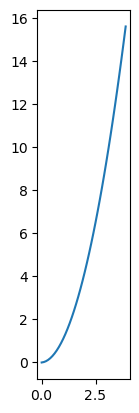

In [62]:
x = np.arange(0.0, 4, 0.1)
y = fun1(x)
plt.plot(x, y)
plt.axis('scaled')
plt.show()

In [65]:
print(numerical_diff(fun1, 0.2))
print(numerical_diff(fun1, 0.4))

0.49999999999994493
0.9000000000000674


## Partial derivatives

In [67]:
def fun2(x):
    return x[0]**2 + x[1]**2

In [68]:
def fun2_1(x1, x2):
    return x1**2 + x2**2    

In [76]:
# partial derivative at x2 = 4
def fun2_part1(x1):
    return 2*x1 + 2*4

In [77]:
# partial derivative at x1 = 3
def fun2_part2(x2):
    return 2*3 + 2*x2

In [78]:
numerical_diff(fun2_part1, 3)

1.9999999999953388

In [79]:
numerical_diff(fun2_part2, 4)

1.9999999999953388

In [86]:
3 + 1e-4

3.0001

In [2]:
import numpy as np

In [3]:
def _numerical_gradient(f, x):
    h = 1e-4

    grad = np.zeros_like(x) 

    for idx in range(x.size):
        # save x[idx]
        tmp = x[idx]

        # for f(x + h)
        x[idx] = tmp + h
        fh1 = f(x)

        # for f(x - h)
        x[idx] = tmp - h
        fh2 = f(x)

        grad[idx] = (fh1 - fh2)/(2*h)
        # restore x[idx]
        x[idx] = tmp

    return grad

In [99]:
_numerical_gradient(fun2, np.array([3.0, 4.0]))

array([6., 8.])

In [100]:
_numerical_gradient(fun2, np.array([0.0, 2.0]))

array([0., 4.])

In [49]:
# works with mini-batch as well
def numerical_gradient(f, x):
    if x.ndim == 1:
        return _numerical_gradient(f, x)
    else:
        grad = np.zeros_like(x)
        for idx, x in enumerate(x):
            grad[idx] = _numerical_gradient(f, x)

        return grad

In [1]:
# x is an np array 
# x1^2 + x2^2

def fun2(x):
    return x[0]**2 + x[1]**2
    

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=300):
    x = init_x

    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad

    return x

In [18]:
init_x = np.array([-3.0, 5.0])

In [26]:
gradient_descent(fun2, init_x, lr=0.0001)

array([ 4.80603344e+12, -9.68668503e+12])

In [35]:
import numpy as np

class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    def predict(self, x):
        return np.dot(x, self.w)


    def softmax(self, a):
        c = np.max(a)
        a = np.exp(a - c)
        s = np.sum(a)
    
        return a/s 


    def cross_entropy_error(self, y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        batch_size = y.shape[0] 
        return -np.sum(t * np.log(y + 1e-7))/batch_size


    def loss(self, x, t):
        z = self.predict(x)
        y = self.softmax(z)
        return self.cross_entropy_error(y, t)

In [36]:
net = SimpleNet()

In [37]:
net.w

array([[-1.8870696 , -0.90016528, -1.70771816],
       [-0.6574631 , -0.00693785,  1.39864672]])

In [45]:
x = np.array([0.6, 0.7])
t = np.array([1.0, 0.0, 0.0])

p = net.predict(x)
print(p)

[-1.59246593 -0.54495567 -0.0455782 ]


In [46]:
net.loss(x, t)

2.1456233388286865

In [41]:
np.argmax(p)

2

In [52]:
def fun_test(w):
    return net.loss(x, t)

dw = numerical_gradient(fun_test, net.w)
print(dw)

[[-0.52980256  0.20009953  0.32970303]
 [-0.61810298  0.23344945  0.38465353]]
